<a href="https://colab.research.google.com/github/andreidore/machine_learning/blob/main/pytorch/pytorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data=load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.target.shape

(569,)

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [23]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.3)
N,D=X_train.shape

In [24]:
N,D

(398, 30)

In [25]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
model=nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [27]:
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters())

In [29]:
X_train= torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32)).reshape(-1,1)
y_test=torch.from_numpy(y_test.astype(np.float32)).reshape(-1,1)

AttributeError: ignored

In [21]:
n_epochs=1000

In [34]:
train_losses=np.zeros(n_epochs)
test_losses=np.zeros(n_epochs)

train_accs=np.zeros(n_epochs)
test_accs=np.zeros(n_epochs)

In [36]:
for it in range(n_epochs):
  optimizer.zero_grad()

  outputs=model(X_train)

  loss=criterion(outputs,y_train)

  loss.backward()

  optimizer.step()

  outputs_test=model(X_test)
  loss_test=criterion(outputs_test,y_test)

  with torch.no_grad():
    p_train=model(X_train)
    p_train=np.round(p_train.numpy())
    train_accs[it]=np.mean(y_train.numpy()==p_train)

    p_test=model(X_test)
    p_test=np.round(p_test.numpy())
    test_accs[it]=np.mean(y_test.numpy()==p_test)

    train_losses[it]=loss.item()
    test_losses[it]=loss_test.item()

  if (it+1)%50==0:
    print(f"Epoch {it+1}/{n_epochs} Train loss: {loss.item():.4f}  Test loss:{loss_test.item():.4f}")
  


Epoch 50/1000 Train loss: 0.0825  Test loss:0.1475
Epoch 100/1000 Train loss: 0.0800  Test loss:0.1458
Epoch 150/1000 Train loss: 0.0778  Test loss:0.1443
Epoch 200/1000 Train loss: 0.0757  Test loss:0.1430
Epoch 250/1000 Train loss: 0.0737  Test loss:0.1418
Epoch 300/1000 Train loss: 0.0719  Test loss:0.1406
Epoch 350/1000 Train loss: 0.0701  Test loss:0.1396
Epoch 400/1000 Train loss: 0.0685  Test loss:0.1387
Epoch 450/1000 Train loss: 0.0670  Test loss:0.1378
Epoch 500/1000 Train loss: 0.0655  Test loss:0.1370
Epoch 550/1000 Train loss: 0.0641  Test loss:0.1363
Epoch 600/1000 Train loss: 0.0628  Test loss:0.1357
Epoch 650/1000 Train loss: 0.0616  Test loss:0.1351
Epoch 700/1000 Train loss: 0.0604  Test loss:0.1345
Epoch 750/1000 Train loss: 0.0592  Test loss:0.1340
Epoch 800/1000 Train loss: 0.0582  Test loss:0.1335
Epoch 850/1000 Train loss: 0.0571  Test loss:0.1331
Epoch 900/1000 Train loss: 0.0561  Test loss:0.1327
Epoch 950/1000 Train loss: 0.0552  Test loss:0.1323
Epoch 1000/10

[]

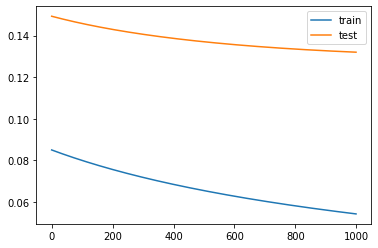

In [38]:
plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.legend()
plt.plot()

[]

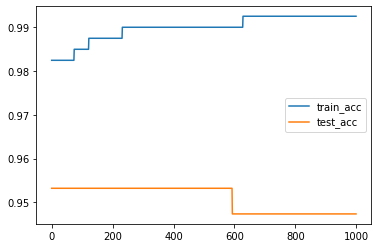

In [39]:
plt.plot(train_accs,label="train_acc")
plt.plot(test_accs,label="test_acc")
plt.legend()
plt.plot()

In [33]:
with torch.no_grad():
  p_train=model(X_train)
  p_train=np.round(p_train.numpy())
  train_acc=np.mean(y_train.numpy()==p_train)

  p_test=model(X_test)
  p_test=np.round(p_test.numpy())
  test_acc=np.mean(y_test.numpy()==p_test)

print(f" Train acc: {train_acc:.4f} Test acc:{test_acc:.4f}")


 Train acc: 0.9824 Test acc:0.9532
